# 影像處理 - 入門

In [15]:
%load_ext autoreload
%autoreload 2
import os, warnings, sys, cv2
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display
sys.path.append('..')
from utils import set_font_cn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 電腦看到的圖象？

**人看到的圖像**

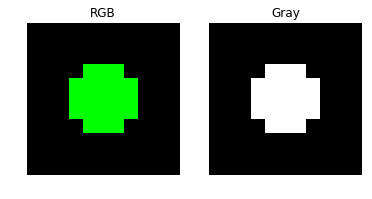

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = np.zeros((11,11,3),np.uint8)#生成一个空彩色图像
cv2.circle(img,(5,5), 1,(0,255,0),2)#修改最后一个参数
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


plt.subplot(121)
plt.imshow(img,'brg')
plt.title('RGB')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_gray,cmap='gray')
plt.title('Gray')
plt.axis('off')
plt.show()





**電腦看到的圖像**
- 圖片是由Pixel(像素)組成, ex: 一般我們說512x512大小的圖片, 就是指橫向有512個pixel, 縱向也有512個pixel, 所以整張圖會有512*512=262144個pixel  
<br>   
- 彩色圖片的Pixel是由三個顏色組成,分別是Red, Green, Blue, 一般稱為RGB三原色, 所以每一個像素點都有3個數字, 分別表示這三種顏色的成分多寡, 數字範圍是0~255  
<br>   
- 黑白圖片的Pixel只有一個數字, 用來表示灰階的強度, 數字範圍一樣是0~255, 0是黑色, 255是白色, 中間都是灰色

In [36]:
print('這是彩色的圖')
collist=[]
for i in range(img.shape[0]):
    rowlist=[]
    for j in range(img.shape[1]):
        rowlist.append(str(img[i,j]))
    collist.append(rowlist)
display(pd.DataFrame(collist))

print('這是黑白的圖')
collist=[]
for i in range(img_gray.shape[0]):
    rowlist=[]
    for j in range(img_gray.shape[1]):
        rowlist.append(str(img_gray[i,j]))
    collist.append(rowlist)
display(pd.DataFrame(collist))

這是彩色的圖


,0,1,2,3,4,5,6,7,8,9,10
0,[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0]
1,[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0]
2,[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0]
3,[0 0 0],[0 0 0],[0 0 0],[0 0 0],[ 0 255 0],[ 0 255 0],[ 0 255 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0]
4,[0 0 0],[0 0 0],[0 0 0],[ 0 255 0],[ 0 255 0],[ 0 255 0],[ 0 255 0],[ 0 255 0],[0 0 0],[0 0 0],[0 0 0]
5,[0 0 0],[0 0 0],[0 0 0],[ 0 255 0],[ 0 255 0],[ 0 255 0],[ 0 255 0],[ 0 255 0],[0 0 0],[0 0 0],[0 0 0]
6,[0 0 0],[0 0 0],[0 0 0],[ 0 255 0],[ 0 255 0],[ 0 255 0],[ 0 255 0],[ 0 255 0],[0 0 0],[0 0 0],[0 0 0]
7,[0 0 0],[0 0 0],[0 0 0],[0 0 0],[ 0 255 0],[ 0 255 0],[ 0 255 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0]
8,[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0]
9,[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0],[0 0 0]


這是黑白的圖


,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,150,150,150,0,0,0,0
4,0,0,0,150,150,150,150,150,0,0,0
5,0,0,0,150,150,150,150,150,0,0,0
6,0,0,0,150,150,150,150,150,0,0,0
7,0,0,0,0,150,150,150,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0


## 影像處理在做什麼？

1. 從Data裡面找到規則  
ex: 比較亮的就是導電粒子  
<br>
2. 把規則寫成程式, 達到處理影像的目的   
ex: 把數字大於100的抓出來, 標示成紅色

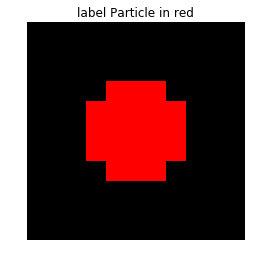

In [52]:
for x,y in list(zip(*np.where(img_gray>100))):
    img[x,y]=[255,0,0]
    

plt.imshow(img,'brg')
plt.title('label Particle in red')
plt.axis('off')
plt.show()


## 那 機器學習 / 深度學習 在做什麼？

- 由電腦來做 **找規則** 這件事  
<br>
- 然後直接告訴我們答案 (ex: 導電粒子在哪裡？)  



## 那工程師要做什麼？

- 訓練電腦找到好的規則  
<br>
- 準備很多的訓練資料, 例如拍很多的影像檔, 然後標註導電粒子在哪裡
- 然後設計一個模型, 輸入圖像, 中間對圖像的數字做很多的數學運算, 然後輸出導電粒子的位置
- 電腦找到的規則就是那個數學運算

***